In [277]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pyarrow.parquet as pq      # for reading parquet file

%matplotlib inline

pd.set_option('display.max_columns', None)

# Objectives of the analysis:

**Research Question:** How does the timing of rides influence trip characteristics (distance, duration, fare) and driver earnings? 
 

**Hypothesis: Rides during peak hours are shorter in distance but have higher fares and driver earnings due to increased demand and congestion, while off-peak rides are longer but less profitable per mile.s

**Assumption: 
Fare: The fares for rides are primarily influenced by base fare structures, surge pricing, and tolls. 
Congestion and demand: It is assumed that higher fares during peak hours reflect both the congestion and increased demand, which could be inferred from trip duration and distance during those times.t.

**Significance:*"



# For my analysis I am using "High Volume For-Hire Vehicle Trip Records for October 2024"
The reason behind choosing this dataset is to analyze trips during a common month of the previous year & because October doesn't have much holidays and school/offices runs on regular schedule we could see how vehicle trips are effected by certain factors

## Some description of the dataset
:> The High Volume For-Hire Vehicle (HVFHV) trip data represents trips dispatched by large rideshare services like Uber and Lyft, which operate under a special license in NYC.

**Key Points:**

    - Each row = One trip taken in an HVFHV (Uber, Lyft, etc.).
    - Local Law 149 of 2018 created a new license category for companies that dispatch 10,000+ trips per day.
    - The law took effect on February 1, 2019, meaning data before this date might not exist for this category.

**The description of the dataset can be found here:** https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_hvfhs.pdf


# Data Cleaning

In [281]:
# loading data 
trips = pq.read_table('fhvhv_tripdata_2024-10.parquet')
trips = trips.to_pandas()

trips.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2024-10-01 00:35:45,2024-10-01 00:38:27,2024-10-01 00:39:44,2024-10-01 00:50:13,161,148,2.92,629,18.72,0.0,0.54,1.77,2.75,0.0,0.0,10.08,N,N,N,N,N
1,HV0003,B03404,B03404,2024-10-01 00:47:18,2024-10-01 00:51:47,2024-10-01 00:54:57,2024-10-01 01:06:18,148,87,2.09,681,42.34,0.0,1.24,4.00,2.75,0.0,0.0,25.35,N,N,N,N,N
2,HV0003,B03404,B03404,2024-10-01 00:02:57,2024-10-01 00:04:48,2024-10-01 00:05:02,2024-10-01 00:12:00,17,49,1.55,418,10.74,0.0,0.29,0.96,0.00,0.0,0.0,6.17,N,N,N,N,N
3,HV0003,B03404,B03404,2024-10-01 00:44:39,2024-10-01 00:47:12,2024-10-01 00:47:18,2024-10-01 01:04:48,106,79,4.23,1050,20.36,0.0,0.60,1.92,2.75,0.0,0.0,15.95,N,N,N,N,N
4,HV0003,B03404,B03404,2024-10-01 00:07:01,2024-10-01 00:12:16,2024-10-01 00:12:46,2024-10-01 00:23:55,198,37,1.91,669,11.36,0.0,0.33,1.07,0.00,0.0,0.0,9.27,N,N,N,N,N


In [282]:
trips.tail()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
20028277,HV0003,B03404,B03404,2024-10-31 23:07:39,2024-10-31 23:11:09,2024-10-31 23:11:16,2024-10-31 23:30:13,170,186,2.07,1137,17.08,0.0,0.49,1.60,2.75,0.0,0.00,15.12,N,N,N,N,N
20028278,HV0003,B03404,B03404,2024-10-31 23:27:07,2024-10-31 23:40:33,2024-10-31 23:41:38,2024-11-01 00:24:09,234,49,5.53,2551,37.55,0.0,1.10,3.55,2.75,0.0,0.00,33.81,N,N,N,N,N
20028279,HV0003,B03404,B03404,2024-10-31 23:15:26,2024-10-31 23:20:21,2024-10-31 23:20:34,2024-10-31 23:58:32,231,263,8.79,2278,42.28,0.0,1.16,3.76,2.75,0.0,0.00,37.42,N,N,N,N,N
20028280,HV0003,B03404,B03404,2024-10-31 23:14:44,2024-10-31 23:16:36,2024-10-31 23:17:02,2024-10-31 23:25:38,249,186,1.36,516,26.10,0.0,0.72,2.32,2.75,0.0,6.37,13.13,N,N,N,N,N
20028281,HV0003,B03404,B03404,2024-10-31 23:25:49,2024-10-31 23:32:08,2024-10-31 23:32:17,2024-11-01 00:03:08,186,265,6.22,1851,33.30,20.0,0.92,0.00,0.00,0.0,5.42,30.81,N,N,N,N,N


In [283]:
# Mapping app company names by 'hvfhs_license_num' column

mapping = {
    'HV0002': 'Juno',
    'HV0003': 'Uber',
    'HV0004': 'Via',
    'HV0005': 'Lyft'
}

trips.insert(1, 'app_company', trips['hvfhs_license_num'].map(mapping))

trips.head()


,hvfhs_license_num,app_company,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,Uber,B03404,B03404,2024-10-01 00:35:45,2024-10-01 00:38:27,2024-10-01 00:39:44,2024-10-01 00:50:13,161,148,2.92,629,18.72,0.0,0.54,1.77,2.75,0.0,0.0,10.08,N,N,N,N,N
1,HV0003,Uber,B03404,B03404,2024-10-01 00:47:18,2024-10-01 00:51:47,2024-10-01 00:54:57,2024-10-01 01:06:18,148,87,2.09,681,42.34,0.0,1.24,4.00,2.75,0.0,0.0,25.35,N,N,N,N,N
2,HV0003,Uber,B03404,B03404,2024-10-01 00:02:57,2024-10-01 00:04:48,2024-10-01 00:05:02,2024-10-01 00:12:00,17,49,1.55,418,10.74,0.0,0.29,0.96,0.00,0.0,0.0,6.17,N,N,N,N,N
3,HV0003,Uber,B03404,B03404,2024-10-01 00:44:39,2024-10-01 00:47:12,2024-10-01 00:47:18,2024-10-01 01:04:48,106,79,4.23,1050,20.36,0.0,0.60,1.92,2.75,0.0,0.0,15.95,N,N,N,N,N
4,HV0003,Uber,B03404,B03404,2024-10-01 00:07:01,2024-10-01 00:12:16,2024-10-01 00:12:46,2024-10-01 00:23:55,198,37,1.91,669,11.36,0.0,0.33,1.07,0.00,0.0,0.0,9.27,N,N,N,N,N


In [284]:
# data types of different variable of the dataset
trips.dtypes

hvfhs_license_num               object
app_company                     object
dispatching_base_num            object
originating_base_num            object
request_datetime        datetime64[us]
on_scene_datetime       datetime64[us]
pickup_datetime         datetime64[us]
dropoff_datetime        datetime64[us]
PULocationID                     int32
DOLocationID                     int32
trip_miles                     float64
trip_time                        int64
base_passenger_fare            float64
tolls                          float64
bcf                            float64
sales_tax                      float64
congestion_surcharge           float64
airport_fee                    float64
tips                           float64
driver_pay                     float64
shared_request_flag             object
shared_match_flag               object
access_a_ride_flag              object
wav_request_flag                object
wav_match_flag                  object
dtype: object

Text(0, 0.5, 'Number of Trips')

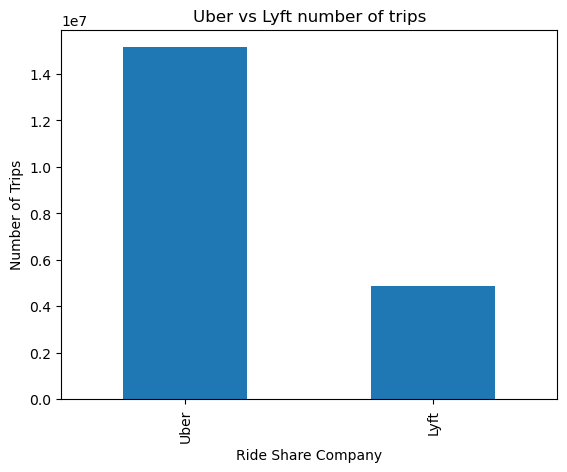

In [285]:
# Just checking number of trips for uber vs Lyft
number_of_trips_by_company = trips['app_company'].value_counts()
number_of_trips_by_company.plot(kind = 'bar')
plt.title('Uber vs Lyft number of trips')
plt.xlabel('Ride Share Company')
plt.ylabel('Number of Trips')

#### Uber does significantly more trips than Lyft suggesting uber is most popular among NYC passengers

## Just looking at lyft data separately

In [288]:
lyft_trips = trips[~trips['app_company'].isin(['Uber'])]
lyft_trips.head(50)

,hvfhs_license_num,app_company,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
9,HV0005,Lyft,B03406,None,2024-10-01 00:33:45,NaT,2024-10-01 00:40:44,2024-10-01 00:56:43,102,180,3.404,959,18.12,0.00,0.44,1.43,0.00,0.0,0.00,15.31,N,N,N,N,Y
21,HV0005,Lyft,B03406,None,2024-10-01 00:07:12,NaT,2024-10-01 00:10:16,2024-10-01 00:29:33,143,113,4.091,1157,25.23,0.00,0.68,2.21,2.75,0.0,0.00,17.75,N,N,N,N,N
24,HV0005,Lyft,B03406,None,2024-10-01 00:10:49,NaT,2024-10-01 00:13:59,2024-10-01 00:20:24,61,61,1.045,385,9.67,0.00,0.24,0.76,0.00,0.0,0.00,5.47,N,N,N,N,N
34,HV0005,Lyft,B03406,None,2024-10-01 00:19:38,NaT,2024-10-01 00:22:12,2024-10-01 00:48:11,164,252,13.136,1559,40.78,6.45,1.30,4.19,2.75,0.0,8.32,33.13,N,N,N,N,N
37,HV0005,Lyft,B03406,None,2024-10-01 00:00:58,NaT,2024-10-01 00:04:55,2024-10-01 00:08:15,40,33,0.718,200,8.61,0.00,0.21,0.68,0.00,0.0,0.00,5.47,N,N,N,N,N
38,HV0005,Lyft,B03406,None,2024-10-01 00:22:47,NaT,2024-10-01 00:30:32,2024-10-01 00:39:36,33,106,2.355,544,11.63,0.00,0.32,1.03,0.00,0.0,2.00,8.52,N,N,N,N,N
39,HV0005,Lyft,B03406,None,2024-10-01 00:39:49,NaT,2024-10-01 00:42:42,2024-10-01 00:50:36,40,181,1.542,474,8.69,0.00,0.24,0.77,0.00,0.0,2.00,6.73,N,N,N,N,N
51,HV0005,Lyft,B03406,None,2024-10-01 00:18:42,NaT,2024-10-01 00:21:12,2024-10-01 00:33:41,225,61,2.087,749,12.40,0.00,0.30,0.98,0.00,0.0,0.00,10.15,N,N,N,N,N
54,HV0005,Lyft,B03406,None,2024-10-01 00:35:59,NaT,2024-10-01 00:39:27,2024-10-01 00:54:53,89,228,2.472,926,14.95,0.00,0.41,1.33,0.00,0.0,3.34,12.40,N,N,N,N,N
69,HV0005,Lyft,B03406,None,2024-09-30 23:57:20,NaT,2024-10-01 00:03:42,2024-10-01 00:23:15,138,263,7.911,1173,37.90,6.77,1.33,4.51,2.75,2.5,0.00,23.95,N,N,N,N,N


In [289]:
lyft_trips.shape

(4882969, 25)

In [290]:
# I believe for Lyft 'on_scene_datetime' column has most value as null
lyft_trips.sort_values(['on_scene_datetime'])

,hvfhs_license_num,app_company,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
10709,HV0005,Lyft,B03406,B03406,2024-10-01 00:21:15,2024-10-01 00:15:26,2024-10-01 00:16:26,2024-10-01 00:22:38,205,10,1.400,372,9.96,0.00,0.24,0.79,0.00,0.0,0.00,21.08,N,N,N,Y,Y
7158,HV0005,Lyft,B03406,B03406,2024-10-01 00:36:14,2024-10-01 00:24:31,2024-10-01 00:25:31,2024-10-01 00:44:57,100,255,6.588,1166,25.37,0.00,0.64,2.05,2.75,0.0,0.00,37.93,N,N,N,Y,Y
9721,HV0005,Lyft,B03406,B03406,2024-10-01 00:41:16,2024-10-01 00:42:43,2024-10-01 00:43:43,2024-10-01 00:49:06,230,50,1.026,323,9.78,0.00,0.27,0.87,2.75,0.0,0.00,20.47,N,N,N,Y,Y
14260,HV0005,Lyft,B03406,B03406,2024-10-01 01:03:53,2024-10-01 01:08:45,2024-10-01 01:09:45,2024-10-01 01:39:29,74,45,8.545,1784,27.02,0.00,0.73,2.35,2.75,0.0,0.00,47.38,N,N,N,Y,Y
19718,HV0005,Lyft,B03406,B03406,2024-10-01 01:17:39,2024-10-01 01:09:07,2024-10-01 01:10:07,2024-10-01 01:26:02,131,205,3.230,955,16.10,0.00,0.44,1.43,0.00,0.0,0.00,29.97,N,N,N,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20028256,HV0005,Lyft,B03406,None,2024-10-31 23:10:39,NaT,2024-10-31 23:15:26,2024-10-31 23:17:44,230,163,0.410,138,8.37,0.00,0.25,0.80,2.75,0.0,0.00,5.47,N,N,N,N,N
20028257,HV0005,Lyft,B03406,None,2024-10-31 23:10:04,NaT,2024-10-31 23:20:47,2024-10-31 23:42:24,163,116,7.033,1297,30.05,0.00,0.83,2.67,2.75,0.0,6.53,24.74,N,N,N,N,N
20028269,HV0005,Lyft,B03406,None,2024-10-31 23:14:03,NaT,2024-10-31 23:17:31,2024-10-31 23:29:10,151,246,3.914,699,19.02,0.00,0.52,1.69,2.75,0.0,0.00,12.16,N,N,N,N,N
20028270,HV0005,Lyft,B03406,None,2024-10-31 23:43:44,NaT,2024-10-31 23:51:15,2024-11-01 01:08:16,100,89,11.054,4621,60.25,5.51,1.56,5.03,2.75,0.0,0.00,60.14,N,N,N,N,N


In [291]:
trips.isnull().sum()

hvfhs_license_num             0
app_company                   0
dispatching_base_num          0
originating_base_num    4869406
request_datetime              0
on_scene_datetime       4868965
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64

In [292]:
print('for lyft `on_scene_datetime` value present for:', 4882969-4868965, 'trips')


for lyft `on_scene_datetime` value present for: 14004 trips


## Looking at Uber data separately

In [294]:
#(trips[trips['app_company'].isin(['Uber'])] and (trips['dispatching_base_num']!=trips['originating_base_num'])).sum()
uber_trips = trips[trips['app_company'] == 'Uber']
(uber_trips['dispatching_base_num'] != uber_trips['originating_base_num']).sum()


763

In [295]:
uber_trips.isnull().sum()

hvfhs_license_num         0
app_company               0
dispatching_base_num      0
originating_base_num    441
request_datetime          0
on_scene_datetime         0
pickup_datetime           0
dropoff_datetime          0
PULocationID              0
DOLocationID              0
trip_miles                0
trip_time                 0
base_passenger_fare       0
tolls                     0
bcf                       0
sales_tax                 0
congestion_surcharge      0
airport_fee               0
tips                      0
driver_pay                0
shared_request_flag       0
shared_match_flag         0
access_a_ride_flag        0
wav_request_flag          0
wav_match_flag            0
dtype: int64

## **Note: [** 
here we see lyft trips has null value for 'originating_base_num' column and 'on_scene_datetime' present for only 15699 trips

Also for uber trips 441 null values are in the 'originating_base_num' column & only 763 values are different between 'originating_base_num' & 'dispatching_base_num' columns so I will definitely leave 'originating_base_num' column out of our analysis because it seems not significant.

**I will leave 'hvfhs_license_num','originating_base_num', 'on_scene_datetime', 'PULocationID',	'DOLocationID', 'access_a_ride_flag', 'wav_request_flag' and 'wav_match_flag' columns out of my analysis because they won't have any significance to driver compensation**
## ]

In [323]:
# removing unnecessary columns
remove_columns = ['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num', 'on_scene_datetime', 'bcf', 'PULocationID',	'DOLocationID', 'access_a_ride_flag', 'wav_request_flag', 'wav_match_flag', 'shared_request_flag', 'shared_match_flag']
trips_less_var = trips.drop(columns=remove_columns)

# Display the first few rows
trips_less_var.head()

,app_company,request_datetime,pickup_datetime,dropoff_datetime,trip_miles,trip_time,base_passenger_fare,tolls,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay
0,Uber,2024-10-01 00:35:45,2024-10-01 00:39:44,2024-10-01 00:50:13,2.92,629,18.72,0.0,1.77,2.75,0.0,0.0,10.08
1,Uber,2024-10-01 00:47:18,2024-10-01 00:54:57,2024-10-01 01:06:18,2.09,681,42.34,0.0,4.00,2.75,0.0,0.0,25.35
2,Uber,2024-10-01 00:02:57,2024-10-01 00:05:02,2024-10-01 00:12:00,1.55,418,10.74,0.0,0.96,0.00,0.0,0.0,6.17
3,Uber,2024-10-01 00:44:39,2024-10-01 00:47:18,2024-10-01 01:04:48,4.23,1050,20.36,0.0,1.92,2.75,0.0,0.0,15.95
4,Uber,2024-10-01 00:07:01,2024-10-01 00:12:46,2024-10-01 00:23:55,1.91,669,11.36,0.0,1.07,0.00,0.0,0.0,9.27


In [325]:
# ading new columns based on analysis requirement

trips_less_var["hour_of_day"] = trips_less_var["pickup_datetime"].dt.hour

# Trip Duration in minutes
trips_less_var["trip_time_minut"] = trips_less_var['trip_time'] / 60

# Compute Per-Mile Earnings
trips_less_var["per_mile_earnings"] = trips_less_var["driver_pay"] / trips_less_var["trip_miles"]

# Compute Ride Efficiency (Minutes per Mile)
trips_less_var["efficiency"] = trips_less_var["trip_time_minut"] / trips_less_var["trip_miles"]

trips_less_var.head()


,app_company,request_datetime,pickup_datetime,dropoff_datetime,trip_miles,trip_time,base_passenger_fare,tolls,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,hour_of_day,trip_time_minut,per_mile_earnings,efficiency
0,Uber,2024-10-01 00:35:45,2024-10-01 00:39:44,2024-10-01 00:50:13,2.92,629,18.72,0.0,1.77,2.75,0.0,0.0,10.08,0,10.483333,3.452055,3.590183
1,Uber,2024-10-01 00:47:18,2024-10-01 00:54:57,2024-10-01 01:06:18,2.09,681,42.34,0.0,4.00,2.75,0.0,0.0,25.35,0,11.350000,12.129187,5.430622
2,Uber,2024-10-01 00:02:57,2024-10-01 00:05:02,2024-10-01 00:12:00,1.55,418,10.74,0.0,0.96,0.00,0.0,0.0,6.17,0,6.966667,3.980645,4.494624
3,Uber,2024-10-01 00:44:39,2024-10-01 00:47:18,2024-10-01 01:04:48,4.23,1050,20.36,0.0,1.92,2.75,0.0,0.0,15.95,0,17.500000,3.770686,4.137116
4,Uber,2024-10-01 00:07:01,2024-10-01 00:12:46,2024-10-01 00:23:55,1.91,669,11.36,0.0,1.07,0.00,0.0,0.0,9.27,0,11.150000,4.853403,5.837696


In [327]:
# checking for duplicates
trips_less_var.duplicated().sum()

0

In [328]:
# shape of the dataset
trips_less_var.shape

(20028282, 17)

In [329]:
# dropping duplicates even there is any
trips_less_var=trips_less_var.drop_duplicates()
trips_less_var.shape

(20028282, 17)

### Note: [ There is no duplicate value in our trips_less_var dataset] 

In [330]:
# Checking for null values
trips_less_var.isnull().sum()

app_company               0
request_datetime          0
pickup_datetime           0
dropoff_datetime          0
trip_miles                0
trip_time                 0
base_passenger_fare       0
tolls                     0
sales_tax                 0
congestion_surcharge      0
airport_fee               0
tips                      0
driver_pay                0
hour_of_day               0
trip_time_minut           0
per_mile_earnings       526
efficiency                1
dtype: int64

In [335]:
trips_less_var = trips_less_var.dropna()

In [337]:
trips_less_var.isnull().sum()

app_company             0
request_datetime        0
pickup_datetime         0
dropoff_datetime        0
trip_miles              0
trip_time               0
base_passenger_fare     0
tolls                   0
sales_tax               0
congestion_surcharge    0
airport_fee             0
tips                    0
driver_pay              0
hour_of_day             0
trip_time_minut         0
per_mile_earnings       0
efficiency              0
dtype: int64

### Note: [ There is no null value in our trips_less_var dataset]

In [339]:
trips_less_var.dtypes

app_company                     object
request_datetime        datetime64[us]
pickup_datetime         datetime64[us]
dropoff_datetime        datetime64[us]
trip_miles                     float64
trip_time                        int64
base_passenger_fare            float64
tolls                          float64
sales_tax                      float64
congestion_surcharge           float64
airport_fee                    float64
tips                           float64
driver_pay                     float64
hour_of_day                      int32
trip_time_minut                float64
per_mile_earnings              float64
efficiency                     float64
dtype: object

### **^^^^ on above part we have cleaned our data and there is no null or duplicate remaining ^^^^^**
#### Below section we will focus on digging deep into the data 

# EDA

In [341]:
# DescriDescriptive statistic
print(trips_less_var.describe())

                 request_datetime             pickup_datetime  \
count                    20027755                    20027755   
mean   2024-10-16 19:04:10.027058  2024-10-16 19:08:39.969900   
min           2024-09-30 23:33:05         2024-10-01 00:00:00   
25%           2024-10-09 07:21:05         2024-10-09 07:25:48   
50%           2024-10-16 22:09:17         2024-10-16 22:14:44   
75%           2024-10-24 18:14:01         2024-10-24 18:18:22   
max           2024-11-01 00:05:00         2024-10-31 23:59:59   
std                           NaN                         NaN   

                 dropoff_datetime    trip_miles     trip_time  \
count                    20027755  2.002776e+07  2.002776e+07   
mean   2024-10-16 19:29:31.505472  5.197432e+00  1.251536e+03   
min           2024-10-01 00:03:05  0.000000e+00  1.000000e+00   
25%           2024-10-09 07:47:13  1.610000e+00  6.260000e+02   
50%           2024-10-16 22:34:31  3.110000e+00  1.019000e+03   
75%           2024-10-24

## Univariate Analysis 

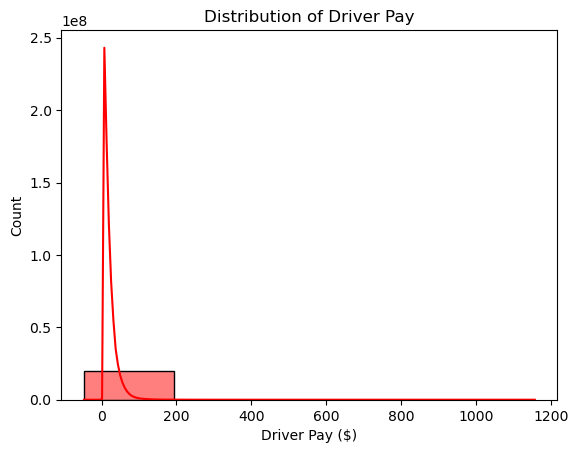

In [343]:
# Distribution of Driver Pay
sns.histplot(trips_less_var["driver_pay"], bins=5, kde=True, color='red')
plt.title("Distribution of Driver Pay")
plt.xlabel("Driver Pay ($)")
plt.show()


#### **Finding:** We see there are outliers present for the driver_pay. most of the pay are below `$200` and there are also some negative values. For our analysis we will only keep data with driver_pay more than $0 and less than Q3 + (1.5 * IQR)

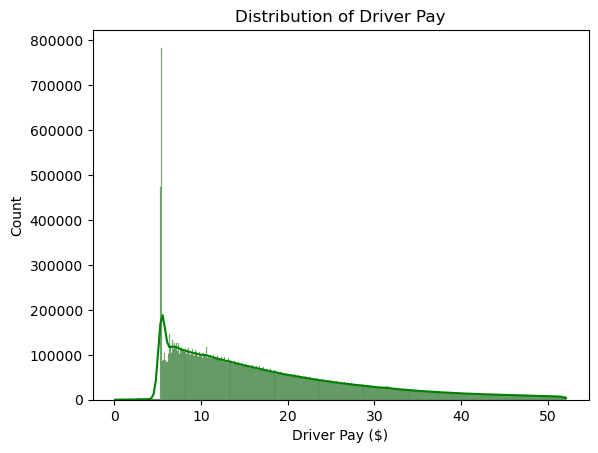

In [384]:
# driver pay visualization
Q1 = trips_less_var["driver_pay"].quantile(0.25)
Q3 = trips_less_var["driver_pay"].quantile(0.75)

# Calculating the IQR
IQR = Q3 - Q1

# keep values where driver_pay > 0 and less than Q3 + 1.5 * IQR
trips_less_var_driver = trips_less_var[(trips_less_var["driver_pay"] > 0) & (trips_less_var["driver_pay"] < (Q3 + 1.5 * IQR))]

# Plot the histogram with KDE (Kernel Density Estimate)
sns.histplot(trips_less_var_driver["driver_pay"], kde=True, color='green')
plt.title("Distribution of Driver Pay")
plt.xlabel("Driver Pay ($)")
plt.show()

In [186]:
# trips_less_var_200= trips_less_var[(trips_less_var["driver_pay"] > 0) & (trips_less_var["driver_pay"] <= 200)]

# # Plot the histogram with KDE (Kernel Density Estimate)
# sns.histplot(trips_less_var_200["driver_pay"], kde=True, color='green')
# plt.title("Distribution of Driver Pay")
# plt.xlabel("Driver Pay ($)")
# plt.show()

#### **Finding:** Most of the trips pays a little over `$50` to the driver where significant number of trips pays around 5 dollars

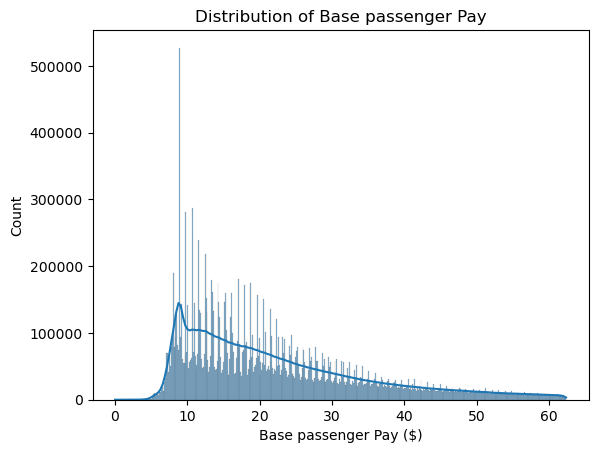

In [385]:
# base passenger fare visualization
Q1 = trips_less_var["base_passenger_fare"].quantile(0.25)
Q3 = trips_less_var["base_passenger_fare"].quantile(0.75)

# Calculating the IQR
IQR = Q3 - Q1

# keep values where driver_pay > 0 and less than Q3 + 1.5 * IQR
trips_less_var_base = trips_less_var[(trips_less_var["base_passenger_fare"] > 0) & (trips_less_var["base_passenger_fare"] < (Q3 + 1.5 * IQR))]

# Plot the histogram with KDE (Kernel Density Estimate)
sns.histplot(trips_less_var_base["base_passenger_fare"], kde=True)
plt.title("Distribution of Base passenger Pay")
plt.xlabel("Base passenger Pay ($)")
plt.show()

#### **Finding:** we can clearly see a relation between driver's pay and Base passenger Fare. Here the distributions are alike, only difference is Base fare is about `$5 to $10`  more than driver pay in all over distribution

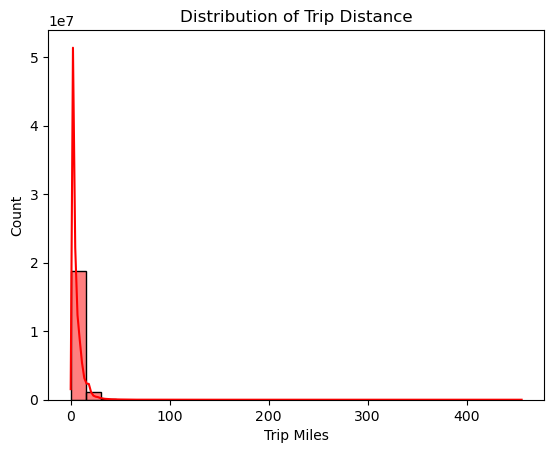

In [348]:
# Distibution of Trip Miles
sns.histplot(trips_less_var["trip_miles"], bins=30, kde=True, color='red')
plt.title("Distribution of Trip Distance")
plt.xlabel("Trip Miles")
plt.show()

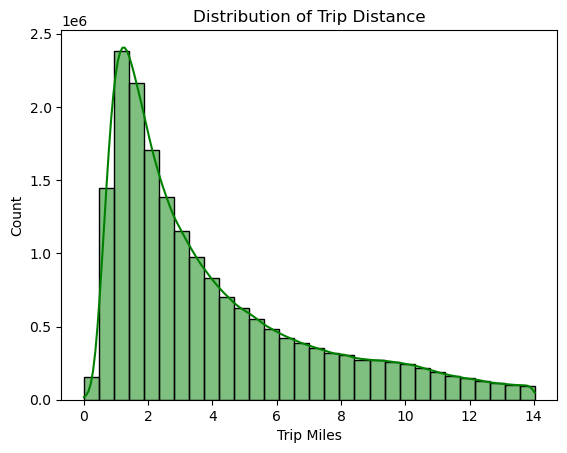

In [349]:
# Using IQR to remove upper outliers
Q1 = trips_less_var["trip_miles"].quantile(0.25)
Q3 = trips_less_var["trip_miles"].quantile(0.75)

# Calculating the IQR
IQR = Q3 - Q1
trips_less_var_short_mile = trips_less_var[trips_less_var["trip_miles"] < (Q3 + 1.5 * IQR)]

# Distibution of Trip Miles
sns.histplot(trips_less_var_short_mile["trip_miles"], bins=30, kde=True, color='green')
plt.title("Distribution of Trip Distance")
plt.xlabel("Trip Miles")
plt.show()


#### **Finding:** Most of the trip duration are below 15 miles and highest number of trips happens below 2 miles suggesting shorter trips are common

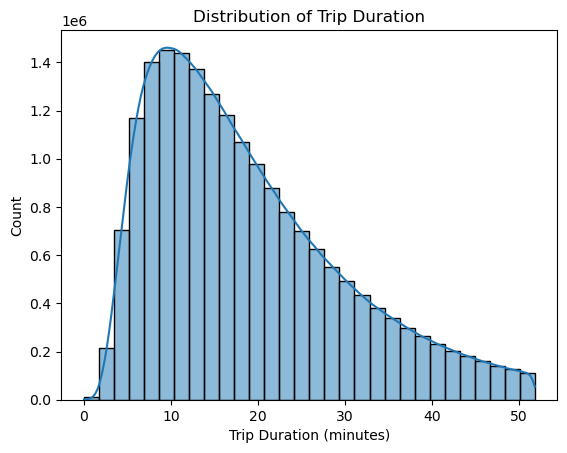

In [350]:
# Distribution of Trip Time using IQR
Q1 = trips_less_var["trip_time_minut"].quantile(0.25)
Q3 = trips_less_var["trip_time_minut"].quantile(0.75)

# Calculating the IQR
IQR = Q3 - Q1
trips_less_var_short_time = trips_less_var[trips_less_var["trip_time_minut"] < (Q3 + 1.5 * IQR)]

sns.histplot(trips_less_var_short_time["trip_time_minut"], bins=30, kde=True)
plt.title("Distribution of Trip Duration")
plt.xlabel("Trip Duration (minutes)")
plt.show()

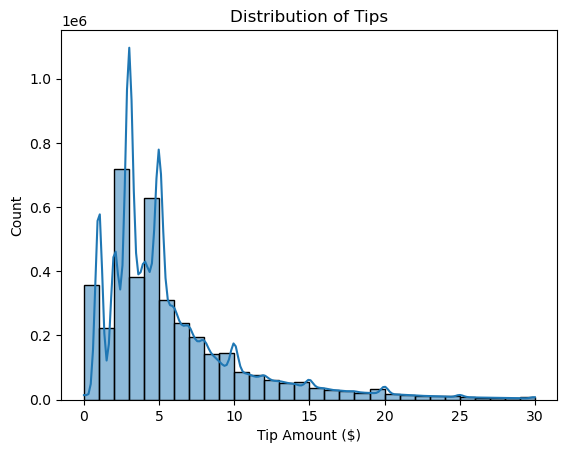

In [429]:
# Distribution of Tip Amount
trips_less_var_short_tip = trips_less_var[(trips_less_var["tips"]>0) &(trips_less_var["tips"]<=30)]
sns.histplot(trips_less_var_short_tip["tips"], bins=30, kde=True)
plt.title("Distribution of Tips")
plt.xlabel("Tip Amount ($)")
plt.show()

#### **Finding:** Tips distribution is a little different than other distributions 

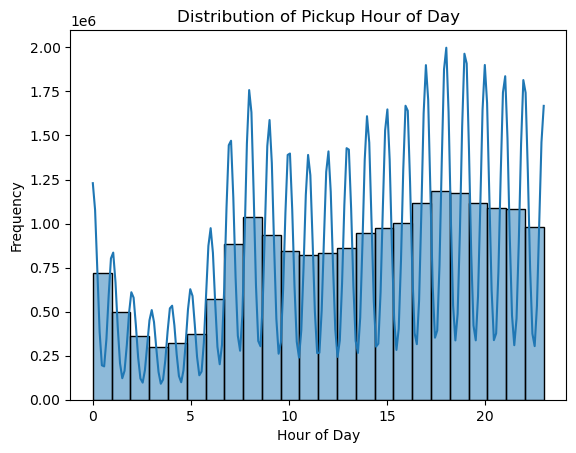

In [359]:
# Distribution of Hour of Day (Peak vs Off-Peak)

sns.histplot(trips_less_var["hour_of_day"], bins=24, kde=True)
plt.title("Distribution of Pickup Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Frequency")
plt.show()

## Relationships Between Variables

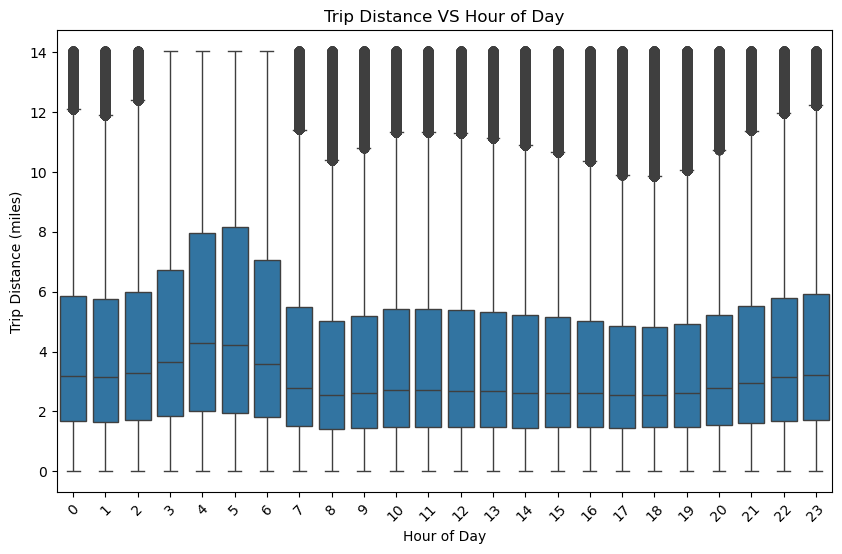

In [379]:
# Trip Distance VS Hour of Day (Peak vs Off-Peak)

plt.figure(figsize=(10, 6))
sns.boxplot(x=trips_less_var_short_mile["hour_of_day"], y=trips_less_var_short_mile["trip_miles"])
plt.title("Trip Distance VS Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Trip Distance (miles)")
plt.xticks(rotation=45)
plt.show()

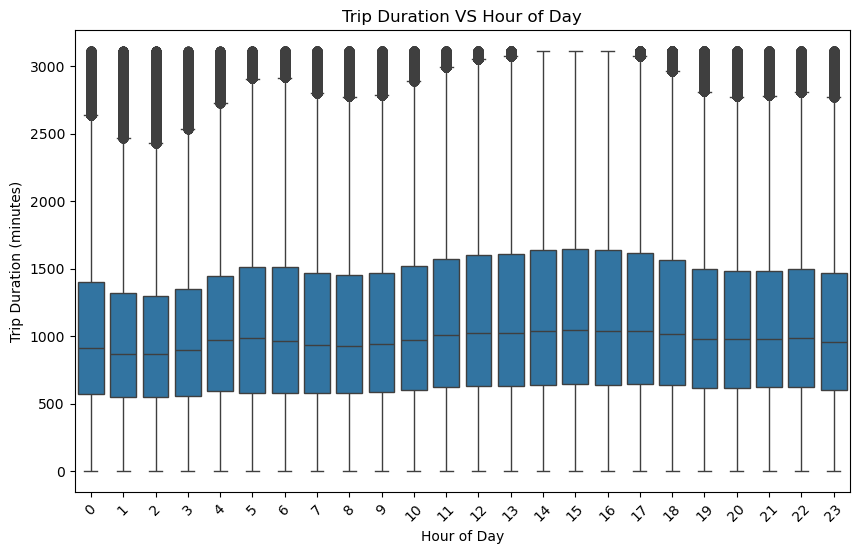

In [378]:
# Trip Duration VS Hour of Day

plt.figure(figsize=(10, 6))
sns.boxplot(x=trips_less_var_short_time["hour_of_day"], y=trips_less_var_short_time["trip_time"])
plt.title("Trip Duration VS Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Trip Duration (minutes)")
plt.xticks(rotation=45)
plt.show()

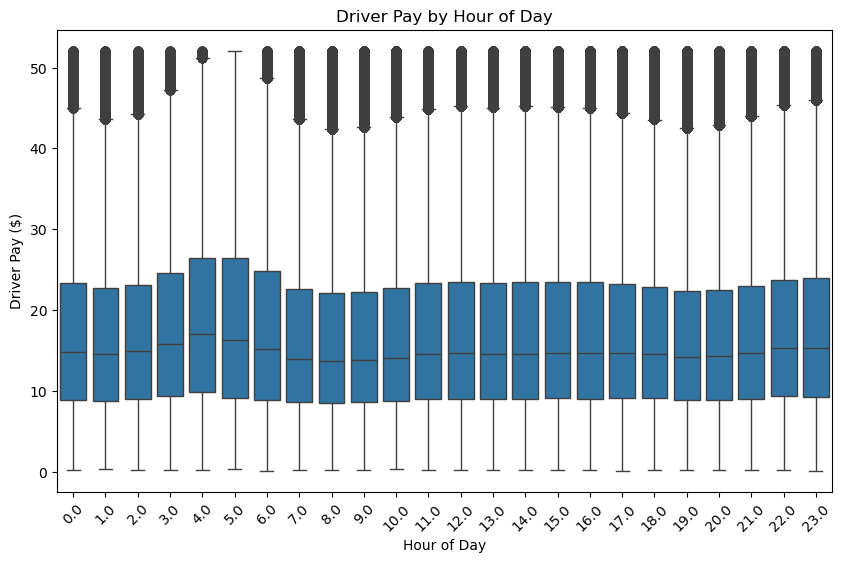

In [390]:
# Driver Pay VS Hour of Day

plt.figure(figsize=(10, 6))
sns.boxplot(x=trips_less_var_driver["hour_of_day"], y=trips_less_var_base["driver_pay"])
plt.title("Driver Pay by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Driver Pay ($)")
plt.xticks(rotation=45)
plt.show()


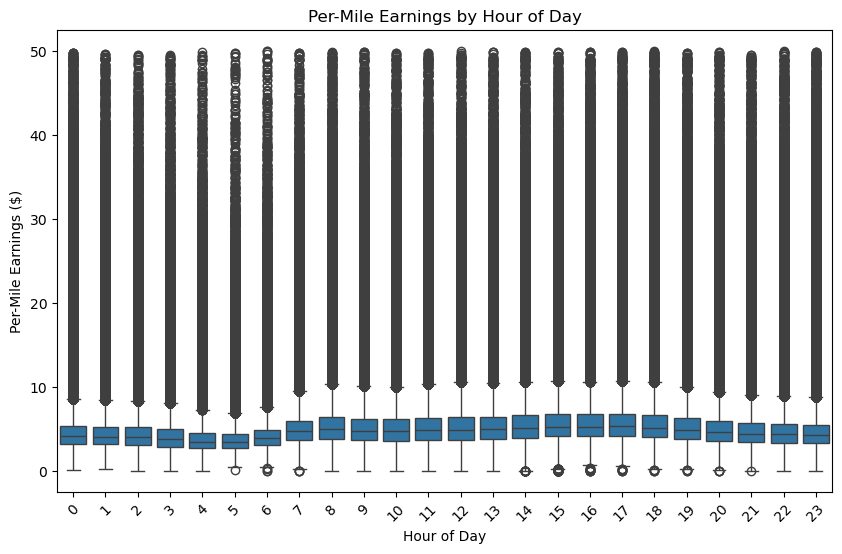

In [407]:
# Per-Mile Earnings by Hour of Day (Peak vs Off-Peak)
trips_less_var_mile_earn = trips_less_var[(trips_less_var['per_mile_earnings'] < 50) & (trips_less_var['per_mile_earnings'] > 0)]

plt.figure(figsize=(10, 6))
sns.boxplot(x=trips_less_var_mile_earn["hour_of_day"], y=trips_less_var_mile_earn["per_mile_earnings"])
plt.title("Per-Mile Earnings by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Per-Mile Earnings ($)")
plt.xticks(rotation=45)
plt.show()

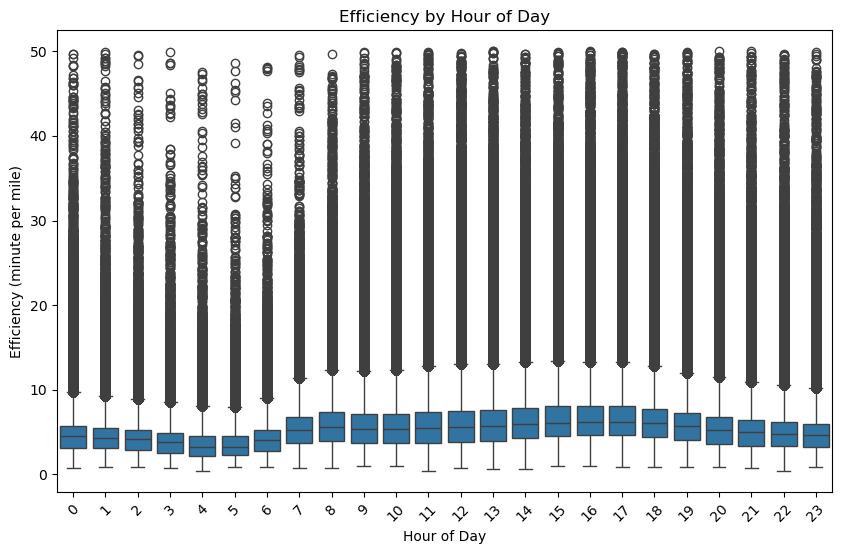

In [413]:
# Efficiency vs Hour of Day
trips_less_var_eff = trips_less_var[(trips_less_var['efficiency'] < 50) & (trips_less_var['efficiency'] > 0)]

plt.figure(figsize=(10, 6))
sns.boxplot(x=trips_less_var_eff["hour_of_day"], y=trips_less_var_eff["efficiency"])
plt.title("Efficiency by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Efficiency (minute per mile)")
plt.xticks(rotation=45)
plt.show()

lower the better

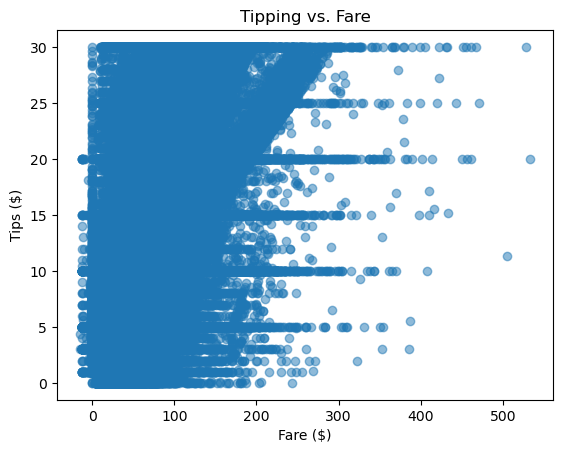

In [460]:
plt.scatter(trips_less_var_short_tip['base_passenger_fare'], trips_less_var_short_tip['tips'], alpha=0.5)
plt.title('Tipping vs. Fare')
plt.xlabel('Fare ($)')
plt.ylabel('Tips ($)')
plt.show()

In [360]:
# # Correlation Matrix
# relational_column = ['trip_miles', 'base_passenger_fare', 'congestion_surcharge', 'tips', 'driver_pay', 'trip_time_minut', 'per_mile_earnings', 'efficiency']

# plt.figure(figsize=(8, 5))
# sns.heatmap(trips_less_var[relational_column].corr(), annot=False, cmap="coolwarm", fmt=".2f")
# plt.title("Heatmap to visualize relation between quantative variables ")
# plt.show()

#### **Findings:** we see here that **Driver pay** is significantly correlated to Trip duration and trip miles. **Efficiency** is only related to per mile earning, **Base Fare** 

# Time-Series Analysis

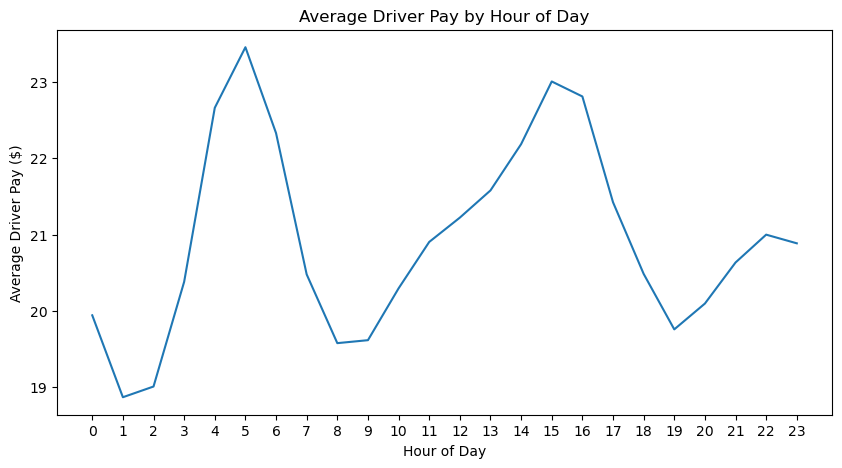

In [367]:
# Mean Driver Pay by Hour of Day
hourly_earnings = trips_less_var.groupby("hour_of_day")["driver_pay"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_earnings.index, y=hourly_earnings.values)
plt.title("Average Driver Pay by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Driver Pay ($)")
plt.xticks(range(0, 24))
plt.show()


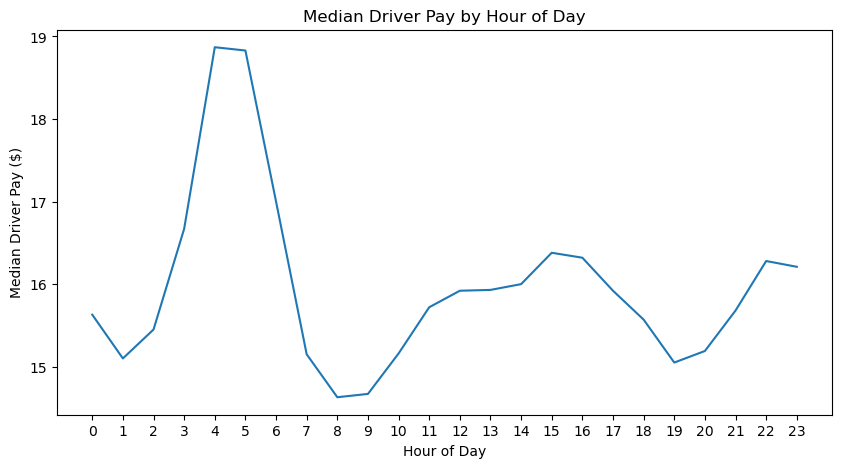

In [369]:
# Median Driver Pay by Hour of Day
hourly_earnings = trips_less_var.groupby("hour_of_day")["driver_pay"].median()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_earnings.index, y=hourly_earnings.values)
plt.title("Median Driver Pay by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Median Driver Pay ($)")
plt.xticks(range(0, 24))
plt.show()

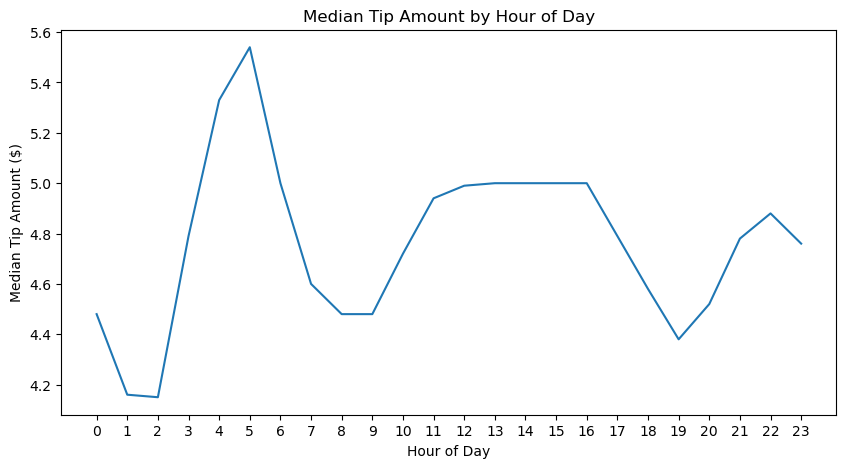

In [435]:
# Hourly Tip Amount Trend

hourly_tips = trips_less_var_short_tip.groupby("hour_of_day")["tips"].median()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_tips.index, y=hourly_tips.values)
plt.title("Median Tip Amount by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Median Tip Amount ($)")
plt.xticks(range(0, 24))
plt.show()

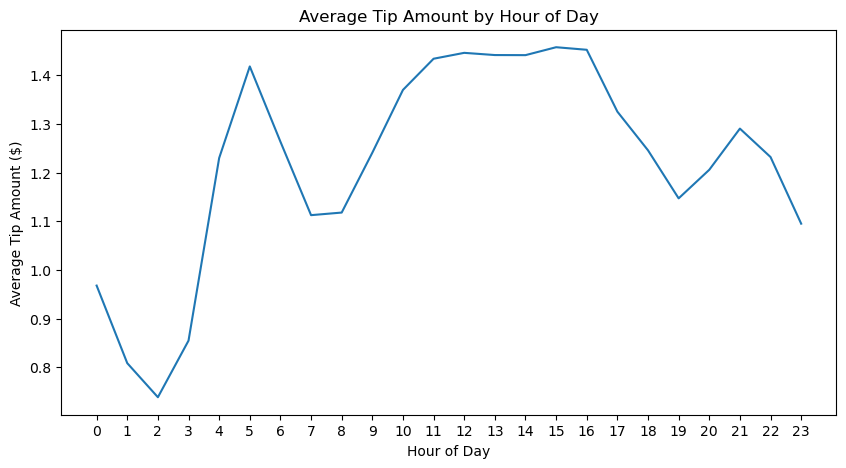

In [433]:
# Hourly Tip Amount Trend
hourly_tips = trips_less_var.groupby("hour_of_day")["tips"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_tips.index, y=hourly_tips.values)
plt.title("Average Tip Amount by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Tip Amount ($)")
plt.xticks(range(0, 24))
plt.show()

In [437]:
trips_less_var.head()

,app_company,request_datetime,pickup_datetime,dropoff_datetime,trip_miles,trip_time,base_passenger_fare,tolls,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,hour_of_day,trip_time_minut,per_mile_earnings,efficiency
0,Uber,2024-10-01 00:35:45,2024-10-01 00:39:44,2024-10-01 00:50:13,2.92,629,18.72,0.0,1.77,2.75,0.0,0.0,10.08,0,10.483333,3.452055,3.590183
1,Uber,2024-10-01 00:47:18,2024-10-01 00:54:57,2024-10-01 01:06:18,2.09,681,42.34,0.0,4.00,2.75,0.0,0.0,25.35,0,11.350000,12.129187,5.430622
2,Uber,2024-10-01 00:02:57,2024-10-01 00:05:02,2024-10-01 00:12:00,1.55,418,10.74,0.0,0.96,0.00,0.0,0.0,6.17,0,6.966667,3.980645,4.494624
3,Uber,2024-10-01 00:44:39,2024-10-01 00:47:18,2024-10-01 01:04:48,4.23,1050,20.36,0.0,1.92,2.75,0.0,0.0,15.95,0,17.500000,3.770686,4.137116
4,Uber,2024-10-01 00:07:01,2024-10-01 00:12:46,2024-10-01 00:23:55,1.91,669,11.36,0.0,1.07,0.00,0.0,0.0,9.27,0,11.150000,4.853403,5.837696


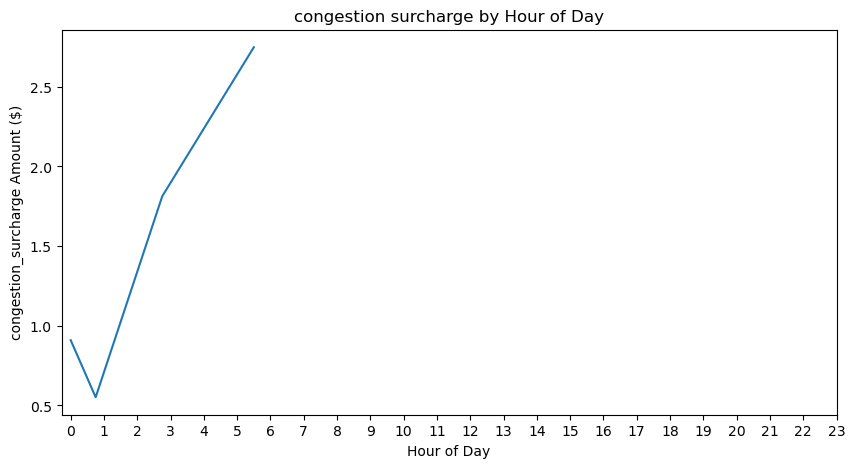

In [445]:
# Hourly congestion surcharge Trend
hourly_tips = trips_less_var.groupby("congestion_surcharge")["tips"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_tips.index, y=hourly_tips.values)
plt.title("congestion surcharge by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("congestion_surcharge Amount ($)")
plt.xticks(range(0, 24))
plt.show()

In [453]:
# plt.scatter(trips_less_var_short_mile['trip_miles'], trips_less_var_short_mile['driver_pay'], alpha=0.5)
# plt.title('Driver Pay vs. Trip Distance')
# plt.xlabel('Trip Distance (miles)')
# plt.ylabel('Driver Pay ($)')
# plt.show()

# Regression Analysis (Time of Day and Driver Earnings)

In [466]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

trips_less_var_model_df = trips_less_var_driver[trips_less_var_driver["efficiency"]<1000]
# Select Features and Target Variable
X = trips_less_var_model_df[["hour_of_day", "trip_miles", "trip_time_minut", "efficiency"]]
y = trips_less_var_model_df["driver_pay"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-Squared Score:", r2_score(y_test, y_pred))

# Coefficients and Feature Importance
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print(coefficients)


Mean Absolute Error: 1.7636726205952786
R-Squared Score: 0.9180175417501301
           Feature  Coefficient
0      hour_of_day    -0.010041
1       trip_miles     1.370405
2  trip_time_minut     0.564657
3       efficiency     0.038036
